In [2]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
def create_data(n,SD):
    '''
    returns data of n random points around centers (1,1) and (-1,-1) each
    The data are normally distributed around centres with standard deviation in x and y directions, SD
    points aroung (1,1): label 1
    points aroung (-1,-1): label 0
    '''
    
    c1 = np.random.normal(1,SD, (n, 2))
    c1 = np.hstack((c1, np.ones((n,1))))

    c2 = np.random.normal(-1,SD, (n, 2))
    c2 = np.hstack((c2, np.zeros((n,1))))

    data = np.vstack((c1, c2))
    return data

In [4]:
def sig_act(s):
    return 1.0/(1.0+np.exp(-s))

def sig_act_prime(s):
    return np.exp(-s)/(1.0+np.exp(-s))**2

def p_force(theta):

# Calculate negative gradient of L2 loss function (and the loss) for 
# a two input function modelled with a two layer (2 hidden node) network
# using sigmoidal activation
# input - parameter vector *theta*
# output - negative gradient of L2 loss *F* and *loss*

    #change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]
    g = np.zeros((9,1));           # g = gradient - start with a zero vector 
    loss = 0                       # training loss

    for i in range(len(tdata)):
        x1 = tdata[i][0]; x2 = tdata[i][1]; c = tdata[i][2];
   
        # calculate intermediates and output of network
        u1 = w11*x1 + w12*x2 + b1
        u2 = w21*x1 + w22*x2 + b2
      
        z1 = sig_act(u1)            # hidden node outputs
        z2 = sig_act(u2)
        u3 = w31*z1 + w32*z2 +b3    # 2nd layer
        
        out = sig_act(u3)
        res = c-out
        loss = loss + res**2        # update the L2 loss
        
        # now calculate the loss gradient components in reverse order
        h3 = -2*res*sig_act_prime(u3) 
        
        g[8] += h3                  # deriv with respect to bias b3
        g[5] += h3*z2               # wrt w32
        g[4] += h3*z1               # wrt w31
        
        h2 = h3* sig_act_prime(u2)  # multipliers
        h1 = h3* sig_act_prime(u1)
        
        g[7] += h2*w32              # wrt b2
        g[6] += h1*w31              # wrt b1
        g[3] += h2*w32*x2           # wrt w22
        g[2] += h2*w32*x1           # wrt w21
        g[1] += h1*w31*x2           # wrt w12
        g[0] += h1*w31*x1           # wrt w11

# negate the gradient to get the descent direction

    F = -g

    return F,loss

def Euler(q_n, h, vector_field):
# computes a step using Euler's method for the given vector field
    F,loss = vector_field(q_n)
    return q_n + h*F, loss

def compute_trajectory( q0, Nsteps, h,  step_function, vector_field):
# computes a trajectory of length *Nsteps*
# for a differential equation defined by *vector_field*
# starting from a given initial condition *q0*
# using a given method defined by *step_function*
# with stepsize *h*
#
# outputs independent variable values *t_traj*, 
# trajectory *q_traj* whose jth column is the solution at time level j

    # initialize trajectory
    q_traj = [q0]; t_traj = [0]
    F,loss = vector_field(q0)
    loss_traj = [loss]

    # starting values
    q = q0; t = 0
    
    # loop
    for n in range(Nsteps):
        # calculate next step using provided stepping function
        q,loss  = step_function(q, h,  vector_field)
        t +=  h

        # update trajectory
        q_traj.append(q)
        t_traj.append(t)
        loss_traj.append(loss)

    return q_traj, t_traj, loss_traj

def p_classifier(x1,x2,theta):
# compute 2-layer planar perceptron classifier for given inputs x1, x2
# parameter theta: a nine component vector

# change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]

    u1 = w11*x1 + w12*x2 + b1
    u2 = w21*x1 + w22*x2 + b2
      
    z1 = sig_act(u1)            # hidden node outputs
    z2 = sig_act(u2)
    u3 = w31*z1 + w32*z2 +b3    # 2nd layer
        
    
    out = sig_act(u3)         # output

    return(out)

In [10]:
    def NN_func(y,theta,x) :
        w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
        w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]

        u1 = w11*x + w12*y + b1
        u2 = w21*x + w22*y + b2

        z1 = sig_act(u1)            # hidden node outputs
        z2 = sig_act(u2)

        return w31*z1 + w32*z2 + b3

In [11]:
def boundary(theta,x):
# Finds the boundary line of the classifier.
# change to weight, bias notation
    
    def func(y,theta=theta[-1].T[0],x=x) :
        w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
        w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]

        u1 = w11*x + w12*y + b1
        u2 = w21*x + w22*y + b2

        z1 = sig_act(u1)            # hidden node outputs
        z2 = sig_act(u2)

        return w31*z1 + w32*z2 + b3
    
    y = fsolve(func,x0=np.zeros(len(x)))

    return(y)

In [12]:
SD = 0.5
tdata = create_data(50,SD)

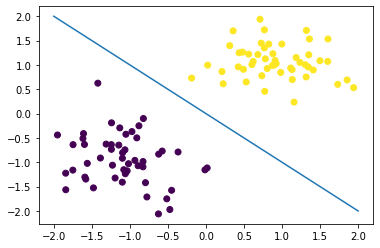

In [13]:
#Plot Data with separating line y = -x
plt.scatter(tdata[:,0], tdata[:,1], c = tdata[:,2])
plt.plot(np.linspace(-2,2, 20), -1*np.linspace(-2,2, 20))

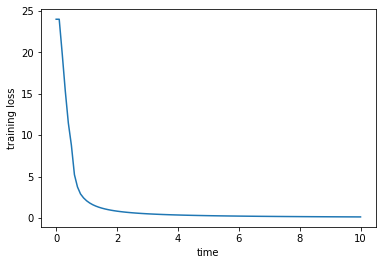

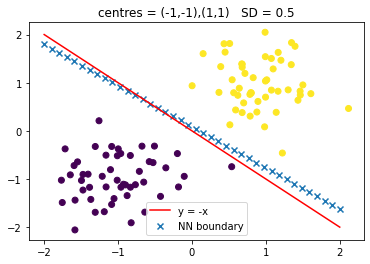

In [14]:
SD = 0.5
tdata = create_data(50,SD)
theta,t,loss = compute_trajectory(np.random.random((9,1)),100,.1,Euler,p_force)
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

plt.show()

x = np.linspace(-2,2,40)
y = boundary(theta,x)
plt.scatter(x,y,marker='x', label = 'NN boundary')
plt.scatter(tdata[:,0], tdata[:,1], c = tdata[:,2])
plt.plot(np.linspace(-2,2, 2), -1*np.linspace(-2,2, 2),c='red',label='y = -x')
plt.title(f'centres = (-1,-1),(1,1)   SD = {SD}')
plt.legend()
plt.show()

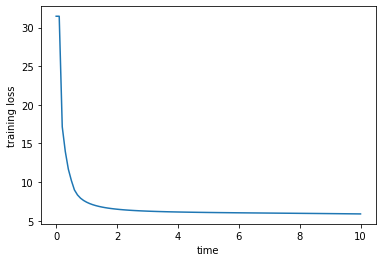

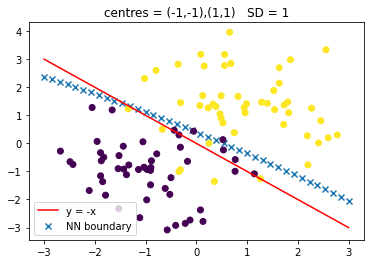

In [15]:
# Repeat with data with a larger spread ( same centres )
SD = 1
tdata = create_data(50,SD)
theta,t,loss = compute_trajectory(np.random.random((9,1)),100,.1,Euler,p_force)
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

plt.show()

x = np.linspace(-3,3,40)
y = boundary(theta,x)
plt.scatter(x,y,marker='x', label = 'NN boundary')
plt.scatter(tdata[:,0], tdata[:,1], c = tdata[:,2])
plt.plot(np.linspace(-3,3, 2), -1*np.linspace(-3,3, 2),c='red',label='y = -x')
plt.legend()
plt.title(f'centres = (-1,-1),(1,1)   SD = {SD}')
plt.show()

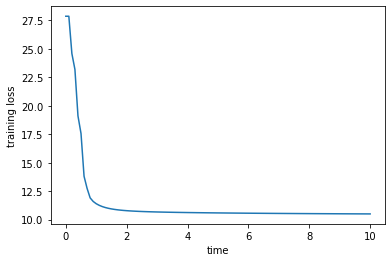

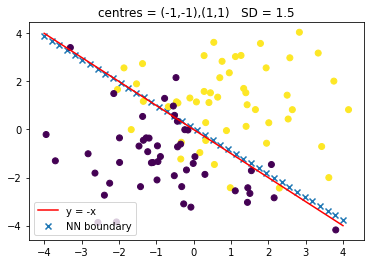

In [16]:
# Repeat with data with a larger spread ( same centres )
SD = 1.5
tdata = create_data(50,SD)
theta,t,loss = compute_trajectory(np.random.random((9,1)),100,.1,Euler,p_force)
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

plt.show()

x = np.linspace(-4,4,40)
y = boundary(theta,x)
plt.scatter(x,y,marker='x', label = 'NN boundary')
plt.scatter(tdata[:,0], tdata[:,1], c = tdata[:,2])
plt.plot(np.linspace(-4,4, 2), -1*np.linspace(-4,4, 2),c='red',label='y = -x')
plt.legend()
plt.title(f'centres = (-1,-1),(1,1)   SD = {SD}')
plt.show()

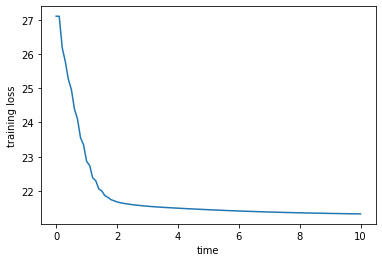

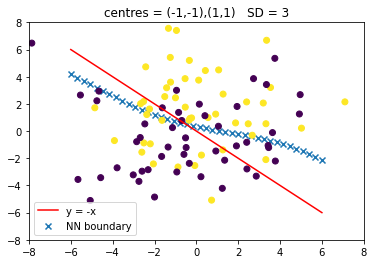

In [24]:
# Repeat with data with a larger spread ( same centres )
SD = 3
tdata = create_data(50,SD)
theta,t,loss = compute_trajectory(np.random.random((9,1)),100,.1,Euler,p_force)
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

plt.show()

x = np.linspace(-6,6,40)
y = boundary(theta,x)
plt.scatter(x,y,marker='x', label = 'NN boundary')
plt.scatter(tdata[:,0], tdata[:,1], c = tdata[:,2])
plt.plot(np.linspace(-6,6, 2), -1*np.linspace(-6,6, 2),c='red',label='y = -x')
plt.legend()
plt.title(f'centres = (-1,-1),(1,1)   SD = {SD}')
plt.xlim((-8, 8))
plt.ylim((-8, 8))
plt.show()

In [18]:
# Now we shall create more interesting data.

def circle_data(n,r,SD,n_pi_rad):
    '''
    returns data of n random points around centers (1,1) and (-1,-1) each
    The data are normally distributed around centres with standard deviation in x and y directions, SD
    points aroung (1,1): label 1
    points aroung (-1,-1): label 0
    '''
    
    c1 = np.random.normal(0,SD, (n, 2))
    c1 = np.hstack((c1, np.ones((n,1))))

    # create a circle of points and add in normal pertubation
    t = np.random.uniform(0,n_pi_rad*np.pi,n)
    c2 = np.array([r*np.cos(t),r*np.sin(t)]).T
    c2 = c2 + np.random.normal(0,SD, (n, 2))
    c2 = np.hstack((c2, np.zeros((n,1))))

    data = np.vstack((c1, c2))
    return data

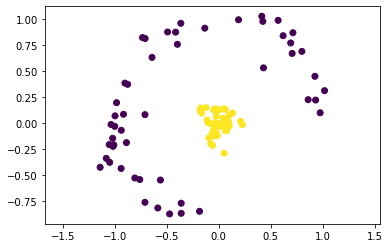

In [19]:
cdata = circle_data(50,1,0.1,3/2)
plt.scatter(cdata[:,0], cdata[:,1], c = cdata[:,2])
plt.axis('equal')
plt.show()

In [20]:
#Could create grid as in assessment 2 rather than find boundary line.

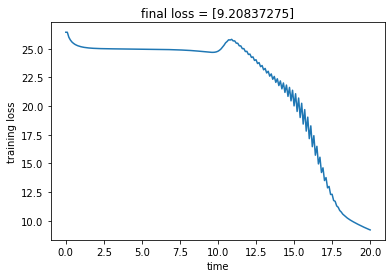

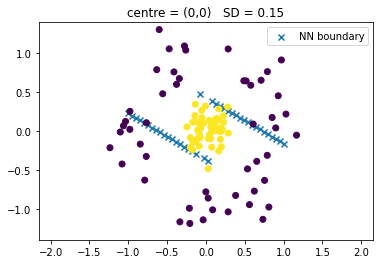

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [53]:

SD = 0.15
r = 1
tdata = circle_data(50,r,SD,2)
theta,t,loss = compute_trajectory(np.random.random((9,1)),200,.1,Euler,p_force)
plt.title(f'final loss = {loss[-1]}')
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

plt.show()

x = np.linspace(-1,1,40)
y = boundary(theta,x)

error = np.abs(NN_func(y,theta=theta[-1].T[0],x=x)) < 10**(-2)     # Checking error of boundary line estimates, 
x_accurate, y_accurate = x[error], y[error]                        # highlighting points if error > 10^-2
flip_error = error == False
x_inaccurate, y_inaccurate = x[flip_error], y[flip_error]

plt.scatter(x_accurate, y_accurate,marker='x', label = 'NN boundary')    
plt.scatter(x_inaccurate, y_inaccurate,marker='x',c = 'red')   
plt.scatter(tdata[:,0], tdata[:,1], c = tdata[:,2])
plt.legend()
plt.title(f'centre = (0,0)   SD = {SD}')
plt.axis('equal')
plt.xlim((-1.4,1.4))
plt.ylim((-1.4,1.4))
plt.show()
print(error)

In [22]:
# the above for n_pi_rad = 1 can find the wrong minima.
# Sometimes it tries to fit a straight line rather than a boomerang. Would be very interesting to see posterior of this
# once Langevin dynamics is up and running.

# Also intereting how the NN cannot find a good classifier when n_pi_rad = 2 (full circle). Could we
# create a NN that can find a good solution?

In [46]:
x = np.array([True,False])
x == False

array([False,  True])